In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import seaborn as sb
from extcore import TZERO

## Wavelength-independent radius radio

In [69]:
cw  = pd.read_hdf('results/external.h5','ckwn/fc')
cr  = pd.read_hdf('results/external.h5','ckrn/fc')
cwl = pd.read_hdf('results/external.h5','ckwn_ldtk/fc')
crl = pd.read_hdf('results/external.h5','ckrn_ldtk/fc')

In [70]:
cs = [cw,cwl,cr,crl]
names='White noise - White noise, LdTK - Red noise - Red noise, LdTK'.split(' - ')

In [71]:
for df in cs[:2]:
    df.tc += TZERO
    df['k'] = sqrt(df.k2_w)
    
for df in cs[2:]:
    df.tc += TZERO
    df['k'] = sqrt(df.k2)

In [72]:
pars = 'tc p b rho k k2'.split()
pe = percentile(crl[pars], [50,16,84], 0)

In [73]:
meds, errs = pe[0,:], abs(pe[1:,:]-pe[0,:]).mean(0)

In [74]:
dft = pd.read_hdf('data/external_lcs.h5','transmission')

In [75]:
filter_centers = array([average(dft.index, weights=b) for a,b in dft.iteritems()])

In [76]:
for p,med,err in zip(pars,meds,errs):
    print '{:4s} & {:10.6f} & {:10.6e} \\\\'.format(p,med,err)

tc   & 2456125.417614 & 9.313808e-05 \\
p    &   3.067859 & 8.326071e-07 \\
b    &   0.199749 & 2.174529e-02 \\
rho  &   4.087012 & 5.546537e-02 \\
k    &   0.170720 & 3.202816e-04 \\
k2   &   0.029145 & 1.093505e-04 \\


In [77]:
def vp(data, *nargs, **kwargs):
    sb.violinplot(data=data, inner='quartiles', scale='width', *nargs, **kwargs)

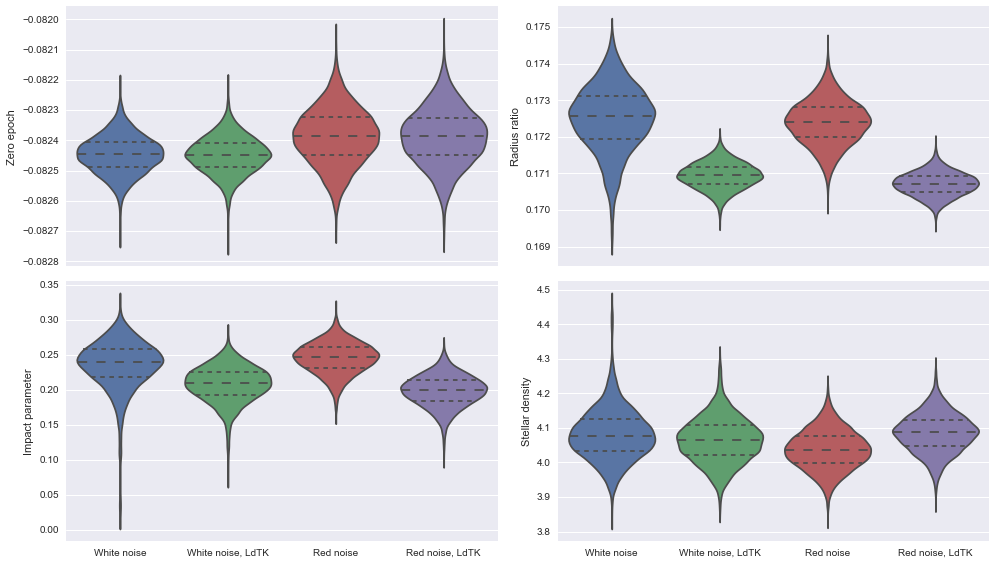

In [89]:
fig,axs = subplots(2,2,figsize=(14,8), sharex=True)
vp([c.tc-TZERO-125.5 for c in cs], ax=axs.flat[0])
vp([c.k for c in cs], ax=axs.flat[1])
vp([c.b for c in cs], ax=axs.flat[2])
vp([c.rho for c in cs], ax=axs.flat[3])
[a.set_ylabel(l) for a,l in zip(axs.flat,'Zero epoch, Radius ratio, Impact parameter, Stellar density'.split(', '))]
axs.flat[2].set_xticklabels(names)
fig.tight_layout()

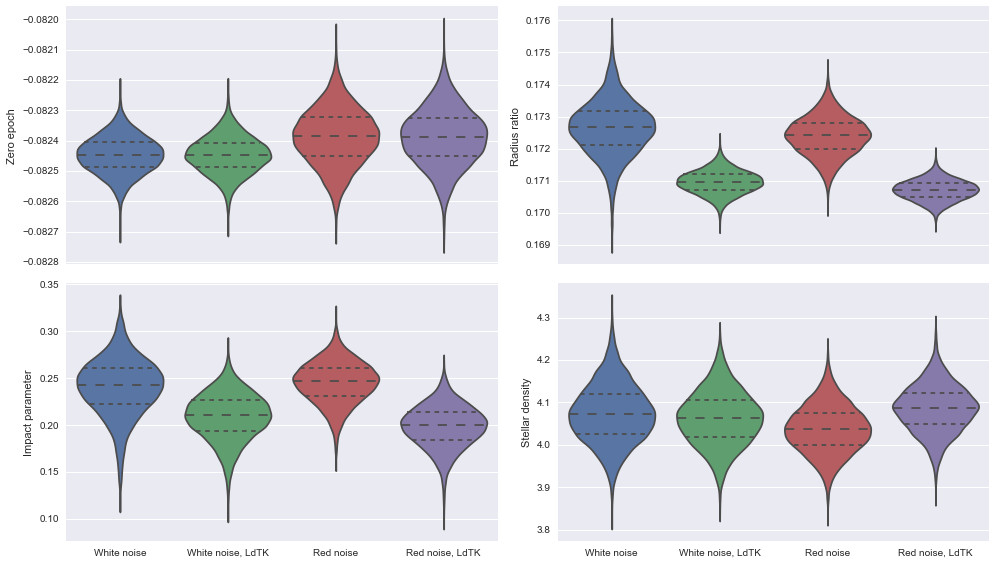

In [12]:
fig,axs = subplots(2,2,figsize=(14,8), sharex=True)
vp([c.tc-TZERO-125.5 for c in cs], ax=axs.flat[0])
vp([sqrt(c.k2) for c in cs], ax=axs.flat[1])
vp([c.b for c in cs], ax=axs.flat[2])
vp([c.rho for c in cs], ax=axs.flat[3])
[a.set_ylabel(l) for a,l in zip(axs.flat,'Zero epoch, Radius ratio, Impact parameter, Stellar density'.split(', '))]
axs.flat[2].set_xticklabels(names)
fig.tight_layout()

In [90]:
lc_names = ("g'$_G$, r'$_G$, r'$_{E}$, i'$_G$, I$_{D}$, z'$_G$, z'$_{T1}$, z'$_{T1}$, J$_G$, H$_G$, K$_G$").split(', ')

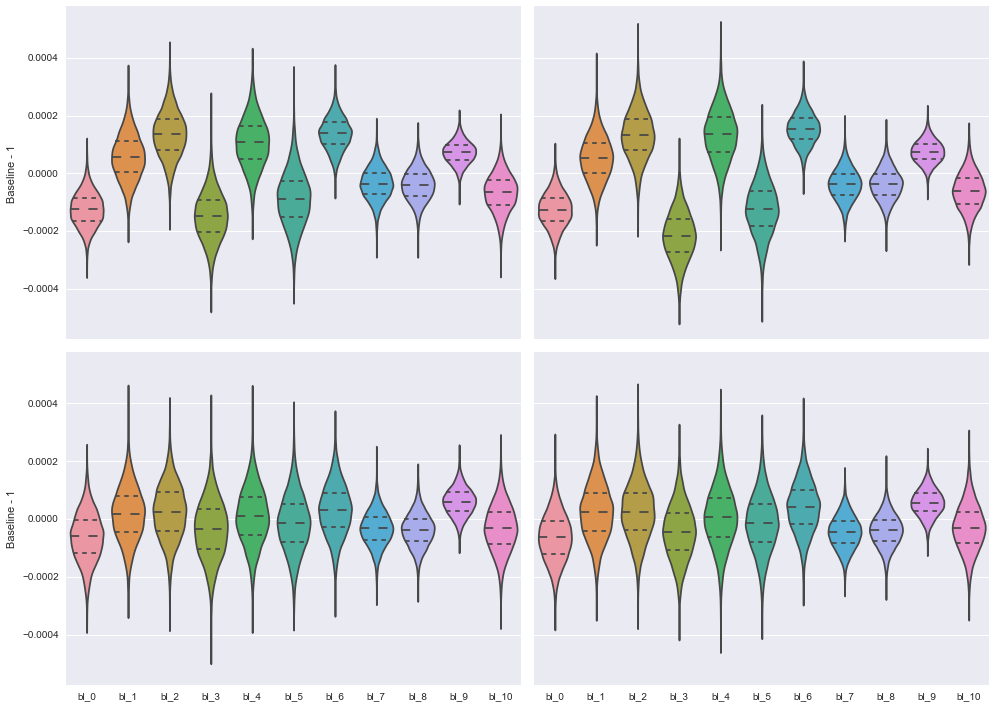

In [91]:
fig,axs = subplots(2,2,figsize=(14,10), sharey=True, sharex=True)
vp(cw[['bl_%i'%i  for i in range(11)]]-1, ax=axs.flat[0], names=lc_names)
vp(cwl[['bl_%i'%i for i in range(11)]]-1, ax=axs.flat[1], names=lc_names)
vp(cr[['bl_%i'%i  for i in range(11)]]-1, ax=axs.flat[2], names=lc_names)
vp(crl[['bl_%i'%i for i in range(11)]]-1, ax=axs.flat[3], names=lc_names)
setp(axs[:,0], ylabel='Baseline - 1')
fig.tight_layout()

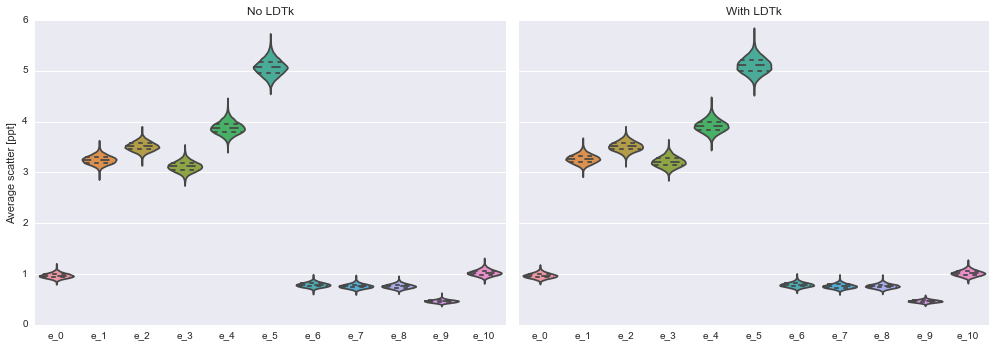

In [92]:
fig,axs = subplots(1,2,figsize=(14,5), sharey=True)
vp(data=cw[['e_%i'%i for i in range(11)]]*1e3, ax=axs.flat[0], names=lc_names)
vp(data=cwl[['e_%i'%i for i in range(11)]]*1e3, ax=axs.flat[1], names=lc_names)
setp(axs[0], ylabel='Average scatter [ppt]', title='No LDTk')
setp(axs[1], title='With LDTk', ylim=(0,6))
fig.tight_layout()

## Wavelength-dependent radius ratio

In [96]:
from extcore import LPFTM
lpf = LPFTM()

In [161]:
vw  = pd.read_hdf('results/external.h5','vkwn/fc')
vr  = pd.read_hdf('results/external.h5','vkrn/fc')
vwl = pd.read_hdf('results/external.h5','vkwn_ldtk/fc')
vrl = pd.read_hdf('results/external.h5','vkrn_ldtk/fc')

In [162]:
vr.shape

(150, 53)

In [148]:
t = vrl.values.reshape([150,-1,60])

In [149]:
t.shape

(150, 80, 60)

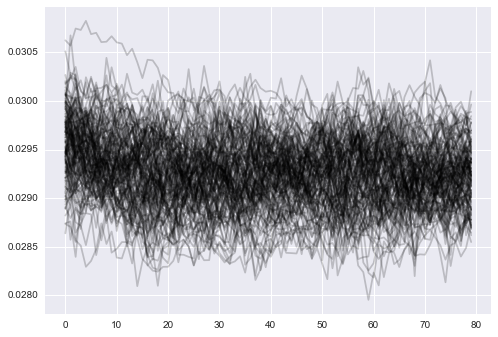

In [157]:
plot(t[:,:,10].T, 'k', alpha=0.2);

In [133]:
vs = [vw,vwl,vr,vrl]

In [134]:
for v in vs:
    for pb in lpf.unique_pbs:
        v['k_%s'%pb] = sqrt(v['k2_%s'%pb])

In [135]:
ks = ['k_%s'%pb for pb in lpf.unique_pbs]

In [136]:
kests = percentile(vwl[ks].values, [50,16,84], 0)

In [137]:
km,ke = kests[0,:], abs(kests[1:,:]-kests[0,:]).mean(0)

In [138]:
print ' & '.join(lpf.unique_pbs) + r' \\'

g & r & i & z & J & H & K \\


In [139]:
print np.array2string(km.round(5), separator=' & ', max_line_width=inf).strip('[]') + r' \\'
print np.array2string(ke.round(5), separator=' & ', max_line_width=inf).strip('[]') + r' \\'

 0.16747 &  0.16954 &  0.17041 &  0.16985 &  0.1653  &  0.17679 &  0.1771  \\
 0.00058 &  0.00046 &  0.00042 &  0.00045 &  0.001   &  0.00075 &  0.00111 \\


In [140]:
ke.round(5)

array([ 0.00058,  0.00046,  0.00042,  0.00045,  0.001  ,  0.00075,  0.00111])

In [141]:
filter_centers

array([  472.44542198,   634.80892456,   777.89949269,   898.93428629,
        1251.9821769 ,  1637.81953472,  2147.63654316])

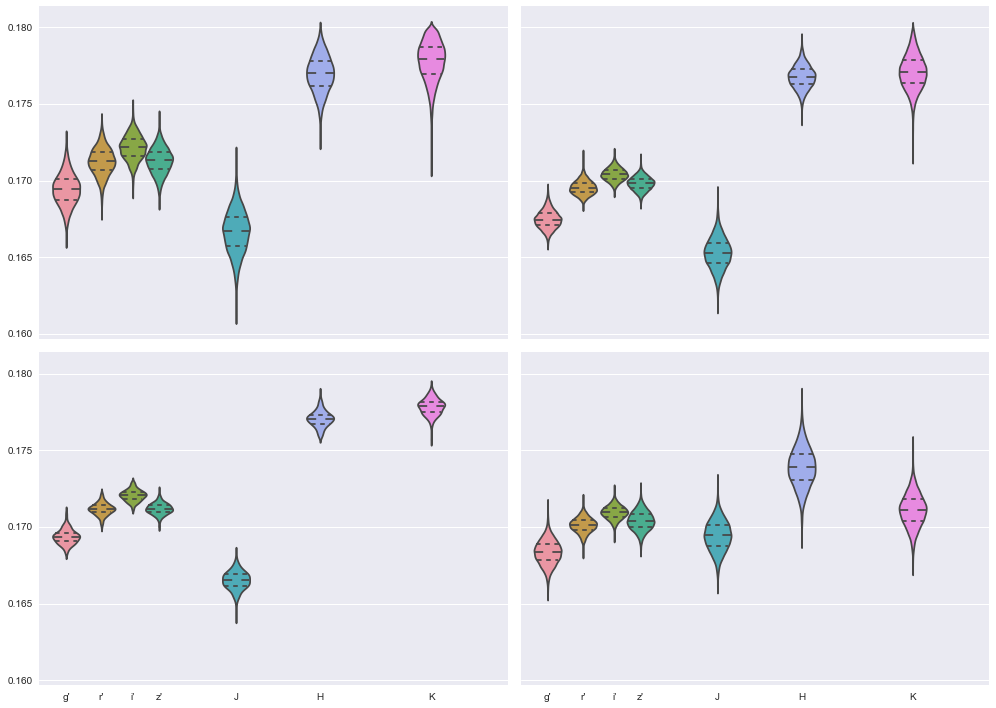

In [142]:
fig,axs = subplots(2,2,figsize=(14,10), sharey=True, sharex=True)
vppars = dict(inner='quartile', scale='width', centers=filter_centers, width=125)
af = axs.flat
sb.violinplot(data=vw[ks],  ax=af[0], **vppars)
sb.violinplot(data=vwl[ks], ax=af[1], **vppars)
sb.violinplot(data=vr[ks],  ax=af[2], **vppars)
sb.violinplot(data=vrl[ks], ax=af[3], **vppars)
setp(axs, xlim=(350,2500), xticks=filter_centers)
[a.set_xticklabels("g' r' i' z' J H K".split()) for a in af[:1]]
fig.tight_layout()

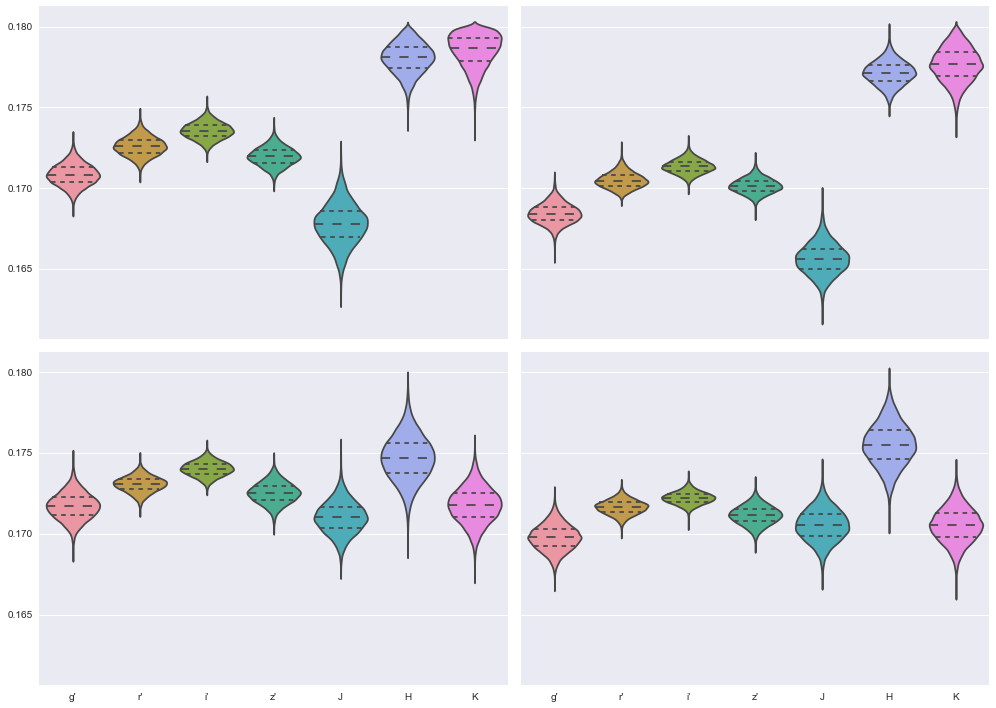

In [65]:
fig,axs = subplots(2,2,figsize=(14,10), sharey=True, sharex=True)
vppars = dict(inner='quartile', scale='width')
af = axs.flat
sb.violinplot(data=vw[ks],  ax=af[0], **vppars)
sb.violinplot(data=vwl[ks], ax=af[1], **vppars)
sb.violinplot(data=vr[ks],  ax=af[2], **vppars)
sb.violinplot(data=vrl[ks], ax=af[3], **vppars)
[a.set_xticklabels("g' r' i' z' J H K".split()) for a in af[2:]]
fig.tight_layout()

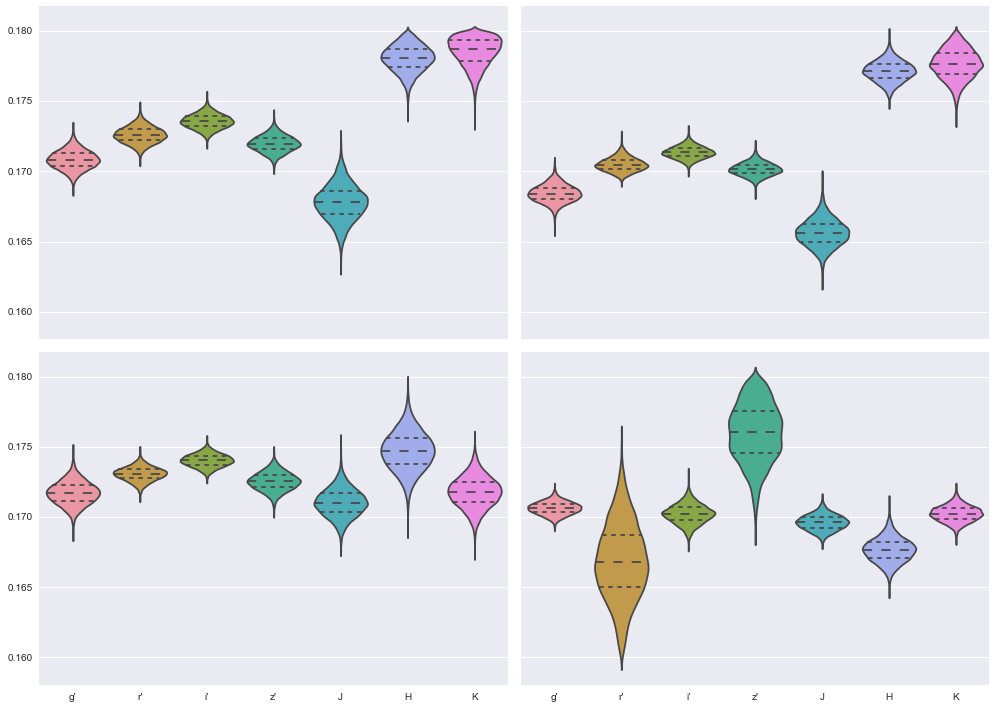

In [21]:
fig,axs = subplots(2,2,figsize=(14,10), sharey=True, sharex=True)
vppars = dict(inner='quartile', scale='width')
af = axs.flat
sb.violinplot(data=vw[ks],  ax=af[0], **vppars)
sb.violinplot(data=vwl[ks], ax=af[1], **vppars)
sb.violinplot(data=vr[ks],  ax=af[2], **vppars)
sb.violinplot(data=vrl[ks], ax=af[3], **vppars)
[a.set_xticklabels("g' r' i' z' J H K".split()) for a in af[2:]]
fig.tight_layout()

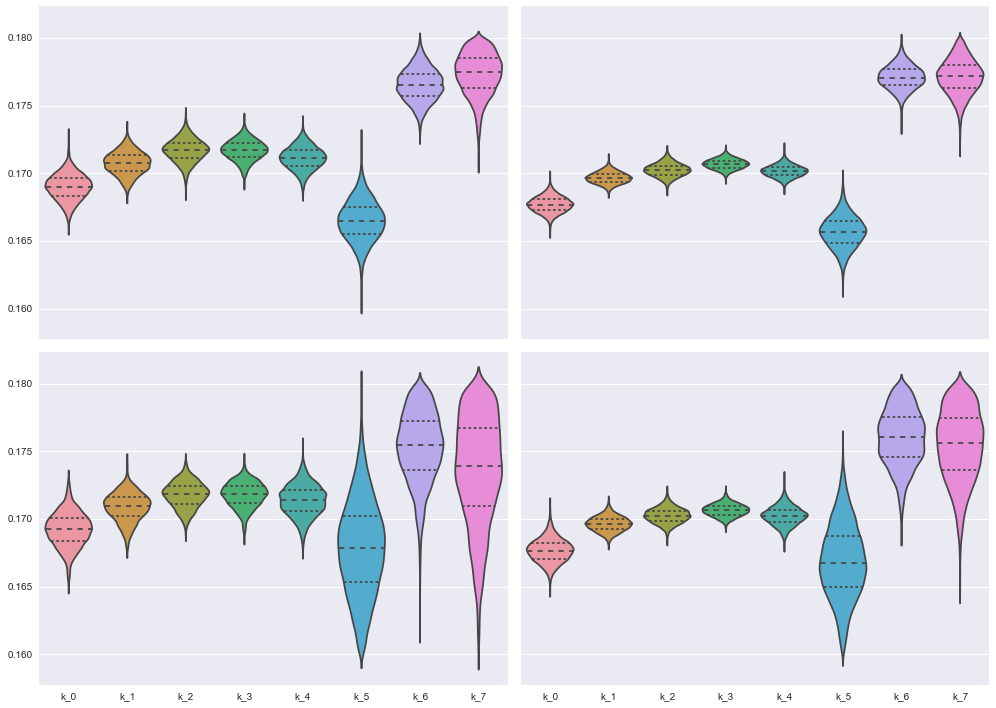

In [16]:
fig,axs = subplots(2,2,figsize=(14,10), sharey=True, sharex=True)
vppars = dict(inner='quartile', scale='width')
af = axs.flat
sb.violinplot(data=vw[ks],  ax=af[0], **vppars)
sb.violinplot(data=vwl[ks], ax=af[1], **vppars)
sb.violinplot(data=vr[ks],  ax=af[2], **vppars)
sb.violinplot(data=vrl[ks], ax=af[3], **vppars)
fig.tight_layout()